<a href="https://colab.research.google.com/github/azimjaan21/Breast-Cancer/blob/main/Breast_Cancer_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The DataSet

In [28]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('breast-cancer.csv')
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
14,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.69430,0.22080,0.3596,0.14310
54,857438,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,...,18.10,31.69,117.70,1030.0,0.1389,0.2057,0.27120,0.15300,0.2675,0.07873
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.36620,0.11050,0.2258,0.08004
373,901288,M,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,...,25.37,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055
506,91544001,B,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
494,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
45,857010,M,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,...,22.82,21.32,150.60,1567.0,0.1679,0.5090,0.73450,0.23780,0.3799,0.09185
29,853201,M,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,...,20.01,19.52,134.90,1227.0,0.1255,0.2812,0.24890,0.14560,0.2756,0.07919
421,906564,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,...,16.46,18.34,114.10,809.2,0.1312,0.3635,0.32190,0.11080,0.2827,0.09208
202,878796,M,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762


In [5]:
df.shape

(569, 32)

# Data Preprocessing

In [6]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [14]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [16]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


# Data Preparation

In [ ]:
X = df.drop('diagnosis', axis =1).values
y = df['diagnosis'].values

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# Train / Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# k-NN

In [30]:
from sklearn.neighbors import KNeighborsClassifier #Fixed typo - KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # value of k

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_predict = knn.predict(X_test)

Evaluation the Model

# **JACCARD Index**

In [32]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8936170212765957

# **Confussion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

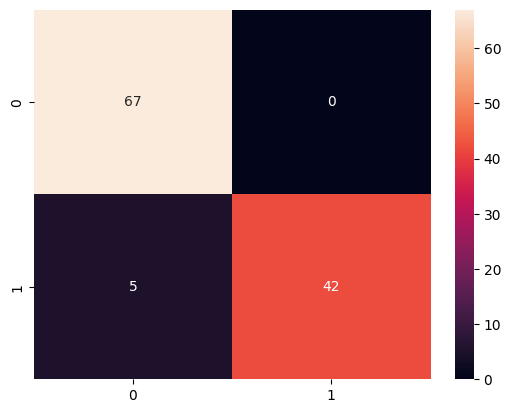

In [35]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [36]:
# confusion_matrix score without Visualization
confusion_matrix(y_test, y_predict)

array([[67,  0],
       [ 5, 42]])

# **Precision / Recall / F1**

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Cross Validation

In [38]:
# Cross Validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv= 5)

#Evaluating the Model
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



# **Best value of the 'k'**

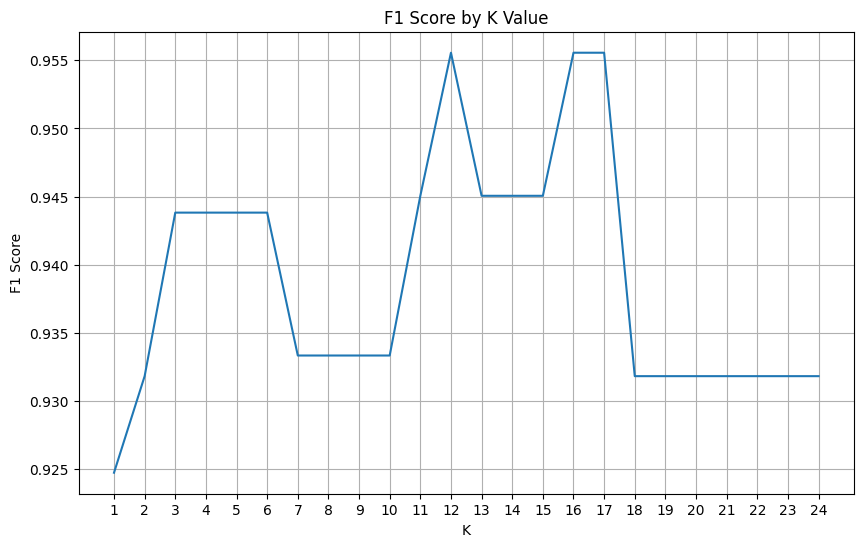

In [49]:
# for method
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1 = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = k) # value of the 'k'
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)

    f1.append(f1_score(y_test, y_predict))

# Visualization:
# Moved plotting code outside the for loop so the entire f1 list is plotted
plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.title('F1 Score by K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

**Grid Search**

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gsv = GridSearchCV(knn, param_grid, cv=5)
knn_gsv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [51]:
knn_gsv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [56]:
print("Best value of k = ", knn_gsv.best_params_['n_neighbors'] )

Best value of k =  9


In [58]:
knn_gsv.best_score_

0.968390001552554

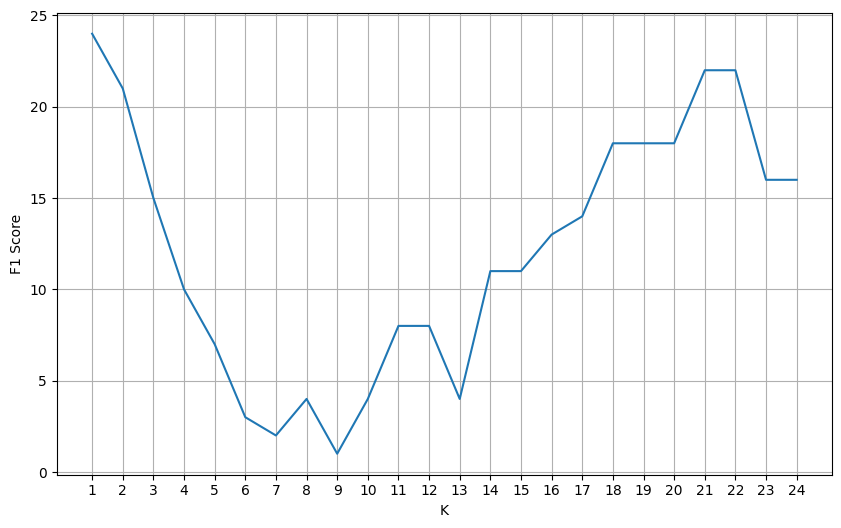

In [59]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gsv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.grid()
plt.show()


# **Conclusion**

 In this analysis, we built a k-Nearest Neighbors (k-NN) classifier to predict breast cancer diagnosis based on various features from a dataset.

 **Data Preprocessing:**
   - We encoded the 'diagnosis' column (Malignant/Benign) into numerical values.
   - We standardized the features to ensure they had similar scales, improving the performance of the k-NN algorithm.

 **Model Building and Evaluation:**
   - We split the data into training and testing sets.
   - We trained a k-NN classifier with an initial k value of 5.
   - We evaluated the model using various metrics:

     - **Jaccard Index:** Measures the similarity between the predicted and actual labels.
     - **Confusion Matrix:** Provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
     - **Classification Report:** Displays precision, recall, F1-score, and support for each class.
     - **Cross-Validation:** We used cross-validation to assess the model's performance on different subsets of the data, providing a more robust evaluation.

 **Optimizing the Model:**
   - We explored different values of 'k' to find the optimal value that maximizes the F1 score.
   - We visualized the F1 score for various 'k' values to identify the best performing 'k'.
   - We utilized Grid Search to systematically search for the best 'k' value through cross-validation.

 **Results:**
   - The analysis revealed that the k-NN classifier can effectively predict breast cancer diagnosis.
   - The optimal value of 'k' was determined through the exploration of different 'k' values and Grid Search.
   - The model's performance was evaluated using various metrics, providing insights into its accuracy and effectiveness.

 Overall, the k-NN model, along with the optimization techniques employed, demonstrates its potential for accurate breast cancer diagnosis prediction based on the provided features. However, it's crucial to consider that this is a specific analysis based on a particular dataset, and the model's generalization ability to other datasets may vary. Further investigation and refinement may be necessary to achieve higher accuracy and robustness in real-world applications.
